# Caso de uso: leer Facebook, obtener estadísticas y aplicar análisis de sentimiento

In [1]:
from facebook_scraper import get_posts   #pip install facebook-scraper
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Inicialice el marco de datos para raspar la publicación de Facebook
post_df_full = pd.DataFrame(columns = [])

In [3]:
# Comience a recopilar datos de publicaciones de Facebook mediante la biblioteca facebook_scraper

for post in get_posts('BACCredomaticCR', Cookies='cookies1.txt', extra_info=True, pages=10, options={"comments": True}):
    post_entry = post
    fb_post_df = pd.DataFrame.from_dict(post_entry, orient='index')
    fb_post_df = fb_post_df.transpose()
    post_df_full = post_df_full.append(fb_post_df)
    print(post['post_id']+' get')

C:\Users\Carlos\anaconda3\lib\site-packages\facebook_scraper\facebook_scraper.py:856: UserWarning: Facebook language detected as es_LA - for best results, set to en_US
  f"Facebook language detected as {locale} - for best results, set to en_US"


6375190749181080 get
6327617230605099 get
6376031459097009 get
6375922305774591 get


KeyboardInterrupt: 

In [29]:
# Verifique la información del marco de datos, se están raspando 47 columnas de datos de la publicación de Facebook
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 0
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        36 non-null     object        
 1   text                           36 non-null     object        
 2   post_text                      36 non-null     object        
 3   shared_text                    36 non-null     object        
 4   original_text                  0 non-null      object        
 5   time                           36 non-null     datetime64[ns]
 6   timestamp                      36 non-null     object        
 7   image                          0 non-null      object        
 8   image_lowquality               36 non-null     object        
 9   images                         35 non-null     object        
 10  images_description             35 non-null     object        
 11  images_lowquality     

In [30]:
post_df_full.to_csv(r'bac_facebook_post.csv', sep=';', encoding='utf-8', header='true')

In [31]:
post_df_full_clean = post_df_full

In [32]:
post_df_full_clean.head()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,reactors,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live
0,6372559649444190,¿Qué es lo que siempre vas a recordar de las e...,¿Qué es lo que siempre vas a recordar de las e...,,None,2023-03-13 14:07:29,1678738049,None,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,[],...,None,None,None,1,None,204957802871103,None,6372558372777651,[6372558372777651],False
0,6372253112808177,Nos transformamos para seguir compartiéndote h...,Nos transformamos para seguir compartiéndote h...,,None,2023-03-13 12:12:50,1678731170,None,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,[],...,None,None,None,28,None,204957802871103,None,6372252546141567,[6372252546141567],False
0,6307937159239773,¡Viví con pasión momentos únicos! Pasá un día ...,¡Viví con pasión momentos únicos! Pasá un día ...,,None,2023-03-13 10:00:07,1678723207,None,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,[],...,None,None,None,3,None,204957802871103,None,6307925489240940,[6307925489240940],False
0,6372510159449139,¡Dancing queen! Siente el ritmo con ABBA en vi...,¡Dancing queen! Siente el ritmo con ABBA en vi...,,None,2023-03-13 10:00:00,1678723200,None,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,[],...,None,None,None,5,None,204957802871103,None,6372506232782865,[6372506232782865],False
0,6324244904275665,"Cumplir metas es emocionante, pero saber que s...","Cumplir metas es emocionante, pero saber que s...",,None,2023-03-12 15:00:01,1678654801,None,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,[],...,None,None,None,3,None,204957802871103,None,None,[],False


In [17]:
# Display header of dataframe
post_df_full.head()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,reactors,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live
0,6372559649444190,¿Qué es lo que siempre vas a recordar de las e...,¿Qué es lo que siempre vas a recordar de las e...,,None,2023-03-13 14:07:29,1678738049,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,[https://scontent.fsyq7-1.fna.fbcdn.net/v/t39....,...,None,None,None,1,None,204957802871103,None,6372558372777651,[6372558372777651],False
0,6372253112808177,Nos transformamos para seguir compartiéndote h...,Nos transformamos para seguir compartiéndote h...,,None,2023-03-13 12:12:50,1678731170,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,[https://scontent.fsyq7-1.fna.fbcdn.net/v/t39....,...,None,None,None,26,None,204957802871103,None,6372252546141567,[6372252546141567],False
0,6307937159239773,¡Viví con pasión momentos únicos! Pasá un día ...,¡Viví con pasión momentos únicos! Pasá un día ...,,None,2023-03-13 10:00:07,1678723207,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,[https://scontent.fsyq7-1.fna.fbcdn.net/v/t39....,...,None,None,None,3,None,204957802871103,None,6307925489240940,[6307925489240940],False
0,6372510159449139,¡Dancing queen! Siente el ritmo con ABBA en vi...,¡Dancing queen! Siente el ritmo con ABBA en vi...,,None,2023-03-13 10:00:00,1678723200,None,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,[],...,None,None,None,4,None,204957802871103,None,6372506232782865,[6372506232782865],False
0,6324244904275665,"Cumplir metas es emocionante, pero saber que s...","Cumplir metas es emocionante, pero saber que s...",,None,2023-03-12 15:00:01,1678654801,None,https://scontent.fsyq7-1.fna.fbcdn.net/v/t39.3...,[],...,None,None,None,2,None,204957802871103,None,None,[],False


In [18]:
# Guarde el marco de datos en el archivo csv
post_df_full.to_csv(r'fb_scrapped_data.csv', index = False)

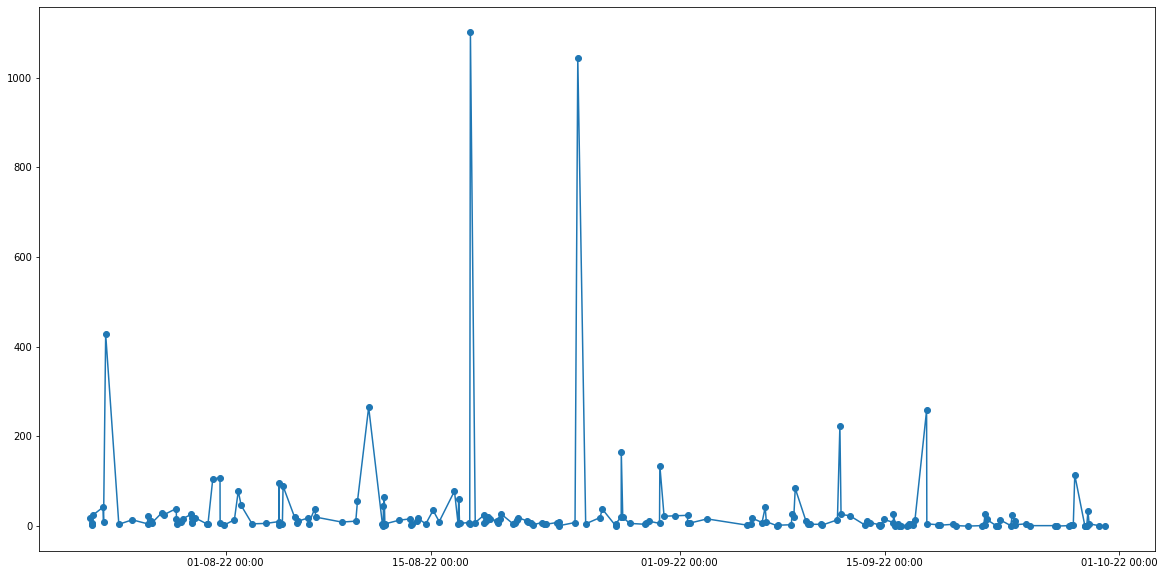

In [8]:
# Realice un gráfico de líneas básico para visualizar la fecha y hora de la publicación frente a los Me gusta
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full['time'], post_df_full['likes'], marker="o")
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [35]:
post_df_full['text']

0    ¿Qué es lo que siempre vas a recordar de las e...
0    Nos transformamos para seguir compartiéndote h...
0    ¡Viví con pasión momentos únicos! Pasá un día ...
0    ¡Dancing queen! Siente el ritmo con ABBA en vi...
0    Cumplir metas es emocionante, pero saber que s...
0    Te entendemos, las cosas a veces no son fácile...
0    Nos encanta complacerte con el mejor entrenami...
0    Nos interesa que logrés tus metas, por eso apo...
0    El talento es para disfrutarlo, por eso querem...
0    Trabajamos para que disfrutés los beneficios d...
0    Seguimos tranformándonos con soluciones que va...
0    En BAC estamos comprometidos con la protección...
0    Knowing me, knowing you... ¡sabemos que no pod...
0    Disfrutá junto a nosotros del espectáculo de u...
0    ¡Viví con pasión momentos únicos! Disfrutá de ...
0    En BAC reimaginamos la banca para generar pros...
0    Porque sabemos que querés vivir momentos lleno...
0    De Italia a Costa Rica llega un artista que, a...
0    Contr